<a href="https://colab.research.google.com/github/JUNYA-727/Tensorflow_Naturallanguage_study/blob/main/tensorflow_naturallanguage3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single Layer LSTM

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
dataset,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFGILEN/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFGILEN/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFGILEN/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [17]:
tokenizer = info.features['text'].encoder
print(tokenizer)

<SubwordTextEncoder vocab_size=8185>


In [8]:
train_dataset,test_dataset=dataset['train'],dataset['test']

print(tf.compat.v1.data.get_output_shapes(train_dataset))

(TensorShape([None]), TensorShape([]))


In [10]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    #双方向
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [20]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 79s 182ms/step - loss: 0.5691 - accuracy: 0.6969 - val_loss: 0.4689 - val_accuracy: 0.7992
Epoch 2/10
391/391 [==============================] - 70s 178ms/step - loss: 0.3763 - accuracy: 0.8453 - val_loss: 0.4251 - val_accuracy: 0.8128
Epoch 3/10
391/391 [==============================] - 69s 176ms/step - loss: 0.3233 - accuracy: 0.8715 - val_loss: 0.4874 - val_accuracy: 0.8112
Epoch 4/10
391/391 [==============================] - 69s 175ms/step - loss: 0.2447 - accuracy: 0.9083 - val_loss: 0.3921 - val_accuracy: 0.8366
Epoch 5/10
391/391 [==============================] - 69s 175ms/step - loss: 0.2032 - accuracy: 0.9243 - val_loss: 0.4505 - val_accuracy: 0.8339
Epoch 6/10
391/391 [==============================] - 69s 175ms/step - loss: 0.2256 - accuracy: 0.9118 - val_loss: 0.4629 - val_accuracy: 0.8204
Epoch 7/10
391/391 [==============================] - 70s 178ms/step - loss: 0.1539 - accuracy: 0.9437 - val_loss: 0.5262 - val_ac

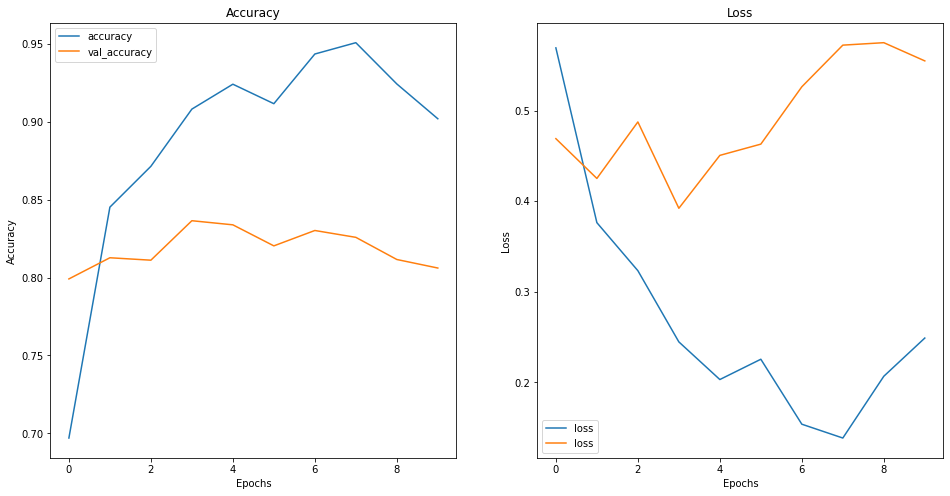

In [58]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(16,8))

ax[0].plot(history.history['accuracy'],label='accuracy')
ax[0].plot(history.history['val_accuracy'],label='val_accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'],label='loss')
ax[1].plot(history.history['val_loss'],label='loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss')
ax[1].legend()

#Multiple Layer LSTM

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    #bidirection→双方向
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 10
history2= model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 144s 349ms/step - loss: 0.6675 - accuracy: 0.5922 - val_loss

In [68]:
history2.history['accuracy']

[0.5921599864959717,
 0.7295200228691101,
 0.8184800148010254,
 0.8576400279998779,
 0.8927599787712097,
 0.9223999977111816,
 0.9467999935150146,
 0.9483199715614319,
 0.9616400003433228,
 0.9712799787521362]

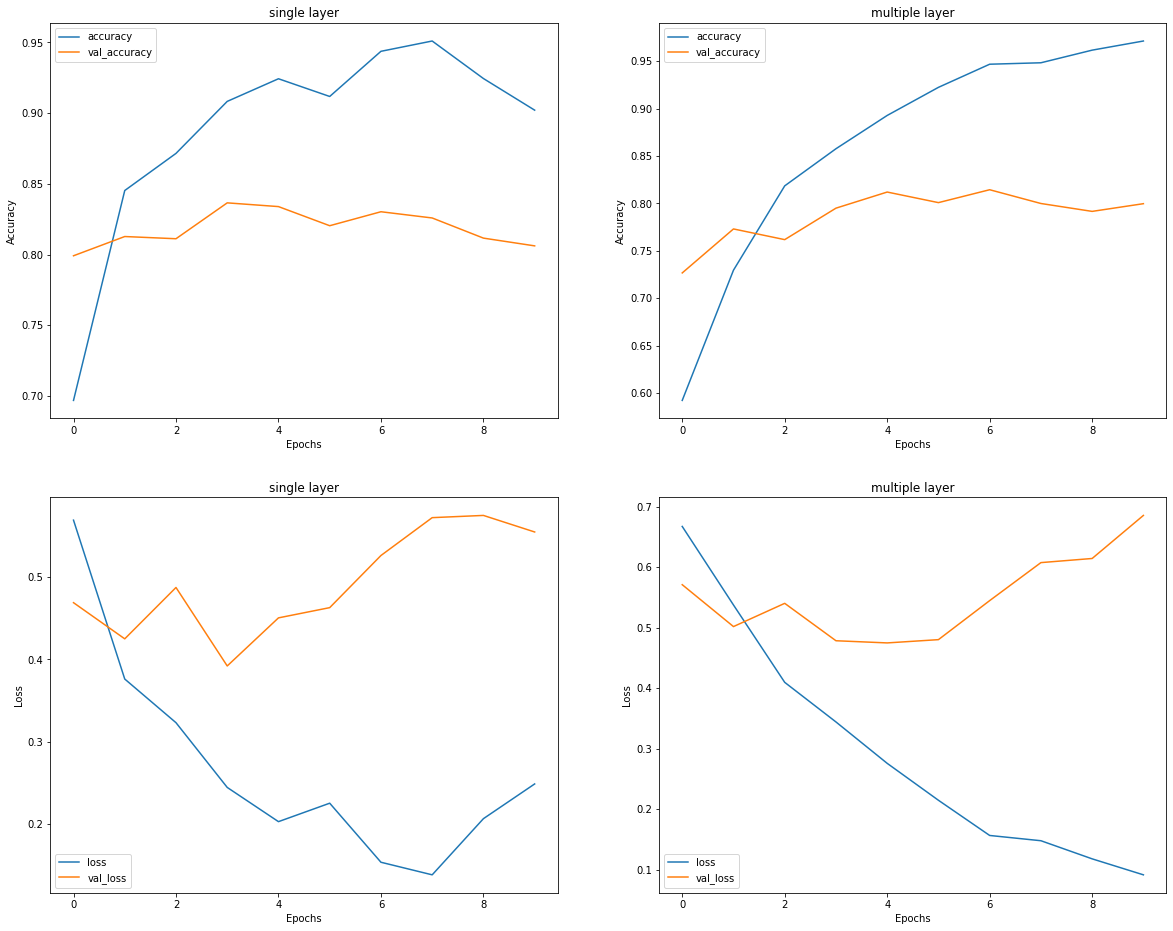

In [73]:
import matplotlib.pyplot as plt
def graph(data1,data2,accuracy,loss):
  fig,ax=plt.subplots(2,2,figsize=(20,16))
  ax[0][0].plot(data1.history[accuracy],label=accuracy)
  ax[0][0].plot(data1.history['val_'+accuracy],label='val_'+accuracy)
  ax[0][0].set_xlabel('Epochs')
  ax[0][0].set_ylabel('Accuracy')
  ax[0][0].set_title('single layer')
  ax[0][0].legend()

  ax[0][1].plot(data2.history[accuracy],label=accuracy)
  ax[0][1].plot(data2.history['val_'+accuracy],label='val_'+accuracy)
  ax[0][1].set_xlabel('Epochs')
  ax[0][1].set_ylabel('Accuracy')
  ax[0][1].set_title('multiple layer')
  ax[0][1].legend() 

  ax[1][0].plot(data1.history[loss],label=loss)
  ax[1][0].plot(data1.history['val_'+loss],label='val_'+loss)
  ax[1][0].set_xlabel('Epochs')
  ax[1][0].set_ylabel('Loss')
  ax[1][0].set_title('single layer')
  ax[1][0].legend()

  ax[1][1].plot(data2.history[loss],label=loss)
  ax[1][1].plot(data2.history['val_'+loss],label='val_'+loss)
  ax[1][1].set_xlabel('Epochs')
  ax[1][1].set_ylabel('Loss')
  ax[1][1].set_title('multiple layer')
  ax[1][1].legend() 

  plt.show()
graph(history,history2,'accuracy','loss')